In [295]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from DateTimeConversionModule import ConvertAndDivideInDaysMonthsAndYear
# from ConvertIATAcodeToCity import 

In [296]:
df =  pd.read_excel('cleanedData.xlsx')
df.head()

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1,no,NaN,London,Stuttgart,NaN,19,11,2023
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2,no,1.0,Brussels,London,NaN,19,11,2023
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3,yes,4.0,London Heathrow,Dublin,NaN,16,11,2023
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1,no,NaN,London,Dublin,NaN,16,11,2023
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1,no,1.0,London,Lisbon,NaN,14,11,2023


In [297]:
df.isnull().sum()

Index                   0
OverallRating           0
ReviewHeader            0
Name                    0
Datetime                0
VerifiedReview          0
ReviewBody              0
TypeOfTraveller         2
SeatType                1
Route                   0
DateFlown               8
SeatComfort             0
CabinStaffService       0
GroundService          11
ValueForMoney           0
Recommended             0
Food&Beverages        258
DepartureCity           0
ArrivalCity             0
LayoverCity          2315
days                    0
months                  0
year                    0
dtype: int64

In [298]:
col =  df['Datetime']
col = list(col)
days =[]
months =[]
years = []
for i in col:
    dict = ConvertAndDivideInDaysMonthsAndYear(i)
    days.append(dict['day'])
    months.append(dict['month'])
    years.append(dict['year'])
df['days'] = days
df['months'] = months
df['year'] = years

In [299]:
df.tail()

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
2795,2795,8,British Airways customer review,Sasha Guignard,12th June 2015,False,Flew from Kiev to London on their Airbus 319 i...,Business,Business Class,Kiev to London,...,NaN,4,yes,NaN,Kiev,London,NaN,12,6,2015
2796,2796,7,British Airways customer review,D Ross,11th June 2015,False,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,...,NaN,5,yes,4.0,London,Vancouver return,NaN,11,6,2015
2797,2797,5,British Airways customer review,J Brown,11th June 2015,False,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,...,NaN,3,yes,3.0,LHR,ORD,NaN,11,6,2015
2798,2798,3,British Airways customer review,Kevin Barrance,11th June 2015,False,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,...,NaN,3,no,1.0,BOM,LHR,NaN,11,6,2015
2799,2799,7,British Airways customer review,Kevin Barrance,11th June 2015,False,This review concerns LHR-BOM in Business Class...,Business,Business Class,LHR-BOM,...,NaN,3,yes,2.0,LHR,BOM,NaN,11,6,2015


In [300]:
l =  [i for i in range(0,len(col))]
df['Index'] =l
df.to_excel('cleanedData.xlsx',index=False)

In [301]:
df.isnull().sum()

Index                   0
OverallRating           0
ReviewHeader            0
Name                    0
Datetime                0
VerifiedReview          0
ReviewBody              0
TypeOfTraveller         2
SeatType                1
Route                   0
DateFlown               8
SeatComfort             0
CabinStaffService       0
GroundService          11
ValueForMoney           0
Recommended             0
Food&Beverages        258
DepartureCity           0
ArrivalCity             0
LayoverCity          2315
days                    0
months                  0
year                    0
dtype: int64

In [302]:
print(df['Food&Beverages'].mean(skipna=True))
print(df['Food&Beverages'].mean())
print(df['Food&Beverages'].median())
print(df['Food&Beverages'].mode())
print(df['Food&Beverages'].median(skipna=True))


2.5987411487018095
2.5987411487018095
2.0
0    1.0
Name: Food&Beverages, dtype: float64
2.0


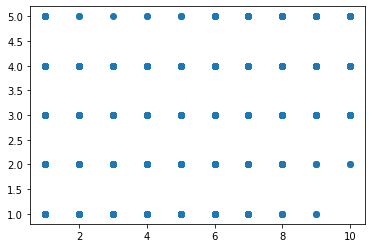

In [303]:
plt.scatter(df['OverallRating'],df['Food&Beverages'])

In [304]:
df['Food&Beverages'] = df['Food&Beverages'].fillna(df['Food&Beverages'].median())

In [305]:
print(df['GroundService'].mean(skipna=True))
print(df['GroundService'].mean())
print(df['GroundService'].median())
print(df['GroundService'].mode())
print(df['GroundService'].median(skipna=True))

2.8196486195769093
2.8196486195769093
3.0
0    1.0
Name: GroundService, dtype: float64
3.0


In [306]:
df['GroundService'] = df['GroundService'].fillna(df['GroundService'].median())

size=df[col].isnull()

In [307]:
df['TypeOfTraveller'] = df['TypeOfTraveller'].fillna(method='ffill')

In [308]:
df['SeatType'] = df['SeatType'].fillna(method='bfill')

In [309]:
df.drop('DateFlown',axis='columns')

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1,no,2.0,London,Stuttgart,NaN,19,11,2023
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2,no,1.0,Brussels,London,NaN,19,11,2023
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3,yes,4.0,London Heathrow,Dublin,NaN,16,11,2023
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1,no,2.0,London,Dublin,NaN,16,11,2023
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1,no,1.0,London,Lisbon,NaN,14,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,8,British Airways customer review,Sasha Guignard,12th June 2015,False,Flew from Kiev to London on their Airbus 319 i...,Business,Business Class,Kiev to London,...,3.0,4,yes,2.0,Kiev,London,NaN,12,6,2015
2796,2796,7,British Airways customer review,D Ross,11th June 2015,False,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,...,3.0,5,yes,4.0,London,Vancouver return,NaN,11,6,2015
2797,2797,5,British Airways customer review,J Brown,11th June 2015,False,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,...,3.0,3,yes,3.0,LHR,ORD,NaN,11,6,2015
2798,2798,3,British Airways customer review,Kevin Barrance,11th June 2015,False,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,...,3.0,3,no,1.0,BOM,LHR,NaN,11,6,2015


In [310]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              2800 non-null   int64  
 1   OverallRating      2800 non-null   int64  
 2   ReviewHeader       2800 non-null   object 
 3   Name               2800 non-null   object 
 4   Datetime           2800 non-null   object 
 5   VerifiedReview     2800 non-null   bool   
 6   ReviewBody         2800 non-null   object 
 7   TypeOfTraveller    2800 non-null   object 
 8   SeatType           2800 non-null   object 
 9   Route              2800 non-null   object 
 10  DateFlown          2792 non-null   object 
 11  SeatComfort        2800 non-null   int64  
 12  CabinStaffService  2800 non-null   int64  
 13  GroundService      2800 non-null   float64
 14  ValueForMoney      2800 non-null   int64  
 15  Recommended        2800 non-null   object 
 16  Food&Beverages     2800 

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1,no,2.0,London,Stuttgart,NaN,19,11,2023
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2,no,1.0,Brussels,London,NaN,19,11,2023
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3,yes,4.0,London Heathrow,Dublin,NaN,16,11,2023
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1,no,2.0,London,Dublin,NaN,16,11,2023
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1,no,1.0,London,Lisbon,NaN,14,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,8,British Airways customer review,Sasha Guignard,12th June 2015,False,Flew from Kiev to London on their Airbus 319 i...,Business,Business Class,Kiev to London,...,3.0,4,yes,2.0,Kiev,London,NaN,12,6,2015
2796,2796,7,British Airways customer review,D Ross,11th June 2015,False,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,...,3.0,5,yes,4.0,London,Vancouver return,NaN,11,6,2015
2797,2797,5,British Airways customer review,J Brown,11th June 2015,False,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,...,3.0,3,yes,3.0,LHR,ORD,NaN,11,6,2015
2798,2798,3,British Airways customer review,Kevin Barrance,11th June 2015,False,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,...,3.0,3,no,1.0,BOM,LHR,NaN,11,6,2015


In [311]:

df['VerifiedReview']=df['VerifiedReview'].astype(int)
df


,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1,no,2.0,London,Stuttgart,NaN,19,11,2023
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2,no,1.0,Brussels,London,NaN,19,11,2023
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3,yes,4.0,London Heathrow,Dublin,NaN,16,11,2023
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1,no,2.0,London,Dublin,NaN,16,11,2023
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1,no,1.0,London,Lisbon,NaN,14,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,8,British Airways customer review,Sasha Guignard,12th June 2015,0,Flew from Kiev to London on their Airbus 319 i...,Business,Business Class,Kiev to London,...,3.0,4,yes,2.0,Kiev,London,NaN,12,6,2015
2796,2796,7,British Airways customer review,D Ross,11th June 2015,0,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,...,3.0,5,yes,4.0,London,Vancouver return,NaN,11,6,2015
2797,2797,5,British Airways customer review,J Brown,11th June 2015,0,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,...,3.0,3,yes,3.0,LHR,ORD,NaN,11,6,2015
2798,2798,3,British Airways customer review,Kevin Barrance,11th June 2015,0,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,...,3.0,3,no,1.0,BOM,LHR,NaN,11,6,2015


In [312]:
df['Recommended'].value_counts()

no     1751
yes    1049
Name: Recommended, dtype: int64

In [313]:
df['Recommended'].replace(['yes','no'],[1,0],inplace=True)
df.head()

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,GroundService,ValueForMoney,Recommended,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,1.0,1,0,2.0,London,Stuttgart,NaN,19,11,2023
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,2,0,1.0,Brussels,London,NaN,19,11,2023
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,3,1,4.0,London Heathrow,Dublin,NaN,16,11,2023
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,1.0,1,0,2.0,London,Dublin,NaN,16,11,2023
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,1,0,1.0,London,Lisbon,NaN,14,11,2023


In [314]:
df.isnull().sum()

Index                   0
OverallRating           0
ReviewHeader            0
Name                    0
Datetime                0
VerifiedReview          0
ReviewBody              0
TypeOfTraveller         0
SeatType                0
Route                   0
DateFlown               8
SeatComfort             0
CabinStaffService       0
GroundService           0
ValueForMoney           0
Recommended             0
Food&Beverages          0
DepartureCity           0
ArrivalCity             0
LayoverCity          2315
days                    0
months                  0
year                    0
dtype: int64

In [315]:
three_char_rows = df[df['ArrivalCity'].str.len()<=3]
arriival_cities = df['ArrivalCity']
df[df['ArrivalCity'].str.len()<=3].value_counts()

Index  OverallRating  ReviewHeader                       Name                 Datetime           VerifiedReview  ReviewBody                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [316]:
col = df["ArrivalCity"]
col = list(col)
col1 = df['DepartureCity']
col1 =list(col1)
col2 = df['LayoverCity']
col2 =list(col2)
import json

# Your list


# File path to save the JSON file
file_path = "my_list.json"

# Write the list to the JSON file
with open(file_path, 'w') as json_file:
    json.dump(col, json_file)

print(f"The list has been written to {file_path}")
url = "https://airport-info.p.rapidapi.com/airport"
headers = {
    "X-RapidAPI-Key": "5eb6c314ccmsh3b593a42e1f460cp1327e4jsn4ce8adb9f999",
    "X-RapidAPI-Host": "airport-info.p.rapidapi.com"
}


def ConvertIATACodeToCity(col):
    for i in col:    
        querystring = {"iata": i}
        if i==np.nan or isinstance(i,float)==True:
            continue
        # print(i)		
        if len(i) > 3:
            continue
        response = requests.get(url, headers=headers, params=querystring)
        parsedData = response.json()
        print(querystring)
        print(parsedData)
        
            
        replacement_value = parsedData['city']
        for j in range(len(col)):
            if replacement_value=="" or replacement_value==" ":
                replacement_value =parsedData['location'].split(',')[0].strip()
                
            if col[j] == i:
                col[j] = replacement_value
ConvertIATACodeToCity(col)
ConvertIATACodeToCity(col1)
ConvertIATACodeToCity(col2)
df['newarrivalcity'] =col
df['newdeparturecity']=col1
df['newlayovercity']=col2

The list has been written to my_list.json


{'iata': 'LAX'}
{'id': 4044, 'iata': 'LAX', 'icao': 'KLAX', 'name': 'Los Angeles International Airport', 'location': 'Los Angeles, California, United States', 'street_number': '1', 'street': 'World Way', 'city': 'Los Angeles', 'county': 'Los Angeles County', 'state': 'California', 'country_iso': 'US', 'country': 'United States', 'postal_code': '90045', 'phone': '+1 855-463-5252', 'latitude': 33.94159, 'longitude': -118.40853, 'uct': -420, 'website': 'http://www.lawa.org/welcomelax.aspx'}
{'iata': 'LHR'}
{'id': 4181, 'iata': 'LHR', 'icao': 'EGLL', 'name': 'Heathrow Airport', 'location': 'London, England, United Kingdom', 'street_number': '', 'street': '', 'city': 'Longford', 'county': 'Greater London', 'state': 'England', 'country_iso': 'GB', 'country': 'United Kingdom', 'postal_code': '', 'phone': '+44 844 335 1801', 'latitude': 51.470024, 'longitude': -0.4542955, 'uct': 60, 'website': 'http://www.heathrow.com/'}
{'iata': 'TXL'}
{'id': 7681, 'iata': 'TXL', 'icao': 'EDDT', 'name': 'Berl

In [317]:
df

,Index,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,Food&Beverages,DepartureCity,ArrivalCity,LayoverCity,days,months,year,newarrivalcity,newdeparturecity,newlayovercity
0,0,1,"""Service level far worse then Ryanair""",L Keele,19th November 2023,1,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,2.0,London,Stuttgart,NaN,19,11,2023,Stuttgart,London,NaN
1,1,3,"""do not upgrade members based on status""",Austin Jones,19th November 2023,1,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,1.0,Brussels,London,NaN,19,11,2023,London,Brussels,NaN
2,2,8,"""Flight was smooth and quick""",M A Collie,16th November 2023,0,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,4.0,London Heathrow,Dublin,NaN,16,11,2023,Dublin,London Heathrow,NaN
3,3,1,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,1,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,2.0,London,Dublin,NaN,16,11,2023,Dublin,London,NaN
4,4,1,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,0,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,1.0,London,Lisbon,NaN,14,11,2023,Lisbon,London,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,8,British Airways customer review,Sasha Guignard,12th June 2015,0,Flew from Kiev to London on their Airbus 319 i...,Business,Business Class,Kiev to London,...,2.0,Kiev,London,NaN,12,6,2015,London,Kiev,NaN
2796,2796,7,British Airways customer review,D Ross,11th June 2015,0,LHR to YVR return. Hard earned Avios points tr...,Business,Business Class,London-Vancouver return,...,4.0,London,Vancouver return,NaN,11,6,2015,Vancouver return,London,NaN
2797,2797,5,British Airways customer review,J Brown,11th June 2015,0,Club World from LHR-ORD. Busy flight on the ag...,Business,Business Class,LHR-ORD,...,3.0,LHR,ORD,NaN,11,6,2015,Chicago,Longford,NaN
2798,2798,3,British Airways customer review,Kevin Barrance,11th June 2015,0,This review refers to a return trip from India...,Business,Premium Economy,BOM-LHR,...,1.0,BOM,LHR,NaN,11,6,2015,Longford,Mumbai,NaN


In [320]:
df.iloc[2611]

Index                                                             2611
OverallRating                                                        1
ReviewHeader                          "never use British Airways again
Name                                                    Frye Callaghan
Datetime                                            6th September 2015
VerifiedReview                                                       0
ReviewBody           I used British Airways to Hong Kong in 2012 an...
TypeOfTraveller                                           Solo Leisure
SeatType                                                 Economy Class
Route                                        JFK to Manchester via LHR
DateFlown                                               September 2015
SeatComfort                                                          1
CabinStaffService                                                    1
GroundService                                                      1.0
ValueF

In [321]:
df.to_excel('cleanestAndReadyForAnalysis.xlsx',index=False)